## Mud card answers
- **can we use the train_MSE + val_MSE to find the best tradeoff between bias and variance?**
    - no, generally just the validation scores are used
- **Why can we conclude that big thetas lead to overfitting?**
    - for linear models like linear and logisti regression, large thetas mean some features need to be multiplied by coefficients on the order of 1e10 or larger which is not usually a reasonable thing to do
- **I am a little bit confused bt the Bias vs Variance definition. Why larger \alpha create high bias?**
- **can you explain why there is underfitting in right upper corner of the alpha and MSE curve.? also about overfitting**
    - if alpha is high, it means that the model coefficients will be small
    - In the extremel case, this means that you'll fit a constant line to your data which is underfitting or high bias
    - the MSE will be high on both the training and validation sets
- **I think for Ridge, the derivative of parabola when x = 0 should be 0?**
    - yes
- **I'm wondering if there is Python function to calculate the l1 or l2 norm of theta directly.**
    - maybe in numpy, please check
    - but you extract the coefficients from sklearn and write your own function to calculate the norms
- **I am not sure what is the use of plot between alpha and thetas, how can we implement this kind of plot.**
    - the plot is implemented in last lecture's notebook :)
    - it's just a way to check how the coefficients change as a function of the regularization parameter
- **How do you discern when to use lasso vs ridge regression?**
    - you should try both
    - if you want to do feature selection, use lasso
- **Ridge regularization is also for feature selection.... no? So if the features selected from LASSO and Ridge are different then do we choose features from LASSO? And Ridge for the secondary explanation later on? Is it correct..**
    - the ridge coefficients are never 0 so it doesn't exclude features naturally
    - but if all features in your dataset has a 0 mean and 1 standard deviation, you can use the coefficients to rank features
    - more on this in PS7
- **what methods can we use to visualize bias and variance in tandem?**
    - the ones I use in class :)
    - plot the train and validation scores as a function of your hyperparameter
- **I feel like there are smarter ways to find the minimizing alpha, such as increasing the resolution of our alpha range near local minimums. Why do we not do this? Does there come a point where getting a more precise alpha has negligible effect? Can we quantify this limiting precision as a function of the number of data points, number of features and other correlation metrics?**
    - sure, you can do all that but usually it's not worth the effort and a gradient descent approach for hyperparameter search can be finicky and often unreliable
    - generally speaking the performance of your model can improve slightly if you improve your parameter search
    - the best way to improve you model performance is to generate new and informative features
    - sklearn has a function called GridSearchCV which we will cover soon to automatize the parameter search for you so you don't need to write for loops

## Supervised ML algorithms
By the end of this module, you will be able to
- Summarize how decision trees, random forests, and support vector machines work
- Describe how the predictions of these techniques behave in classification and regression
- Describe which hyper-parameters should be tuned

## Which ML algorithm to try on your dataset?

- there is no algo that performs well under all conditions!
- you need to try a few to find the one that performs best
- but you might be able to exclude some algos in advance
   - large dataset (>1e6 points)
   - more features than  points
- other than predictive power, what else is important for you?
   - how the model behaves with respect to outliers?
   - does the prediction varies smoothly with the feature values?
   - can the model capture non-linear dependencies?
   - is the model easy to interpret for a human?

### Goal for this module: fill out the table:

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|<font color='red'>tbd</font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|<font color='red'>tbd</font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| random forest classification 	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|


## Linear regression

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(-0.5, 1.5, 2000)

reg = LinearRegression()
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


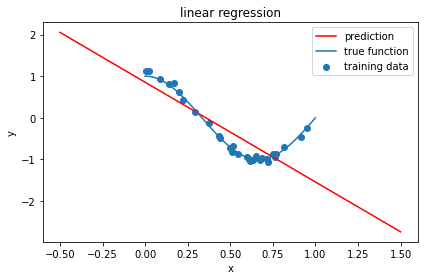

In [2]:
import matplotlib.pyplot as plt
import matplotlib 
plt.scatter(X,y,label='training data')
plt.plot(X_new,y_new,'r',label='prediction')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('linear regression')
plt.legend()
plt.tight_layout()
plt.savefig('figures/lin_reg.png',dpi=300)
plt.show()

## Logistic regression

In [3]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.linear_model import LogisticRegression
# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = LogisticRegression()
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

LogisticRegression()

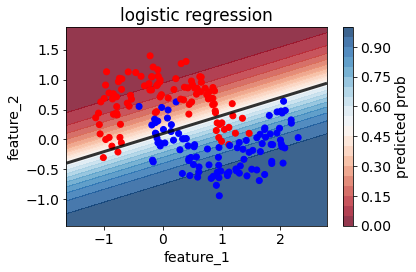

In [4]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams.update({'font.size': 14})

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('logistic regression')
plt.tight_layout()
plt.savefig('figures/logistic_reg.png',dpi=300)
plt.show()

<center><img src="figures/logistic_reg.png" width="700"></center>

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|<font color='red'>linear extrapolation</font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|<font color='red'>scales with distance from the decision boundary </font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| random forest classification 	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|



### Quiz 1

Calculate the predicted probabilities on X for the logistic regression model and determine what critical probability gives the best f1 score. Round to the second significant digit!


## <center>Decision trees and random forests</center>

- Decision tree: the data is split according to certain features
- Here is an example tree fitted to data:

<center><img src = 'figures/Decision-Trees-modified-1.png' width="500"></center>

<center><img src = 'figures/Decision-Trees-modified-1.png' width="500"></center>

- Trees have nodes and leaves.
- The critical values and features in the nodes are determined automatically by minimizing a cost function.

- Random forest: ensemble of random decision trees
- Each tree sees a random subset of the training data, that's why the forest is random.

<center><img src="figures/tree.png" width="450"></center>



### Quiz 2
- Use the dataset below and create a decision tree with max_depth = 2 to predict the target variable! What is your tree's prediction for each person?
- Remember, your tree does not need predict everyone perfectly.
- It just needs to get as many people as possible right.

| X|age|gender (M=0, F=1)|is student?|is parent?|uses computer for work?|nr. of hours on c.|<font color='red'>Like computer games?</font>|
|-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|__person 1__| 5|0|1|0|0|0.0|__<font color='red'>1</font>__|
|__person 2__|48|1|0|1|0|1.8|__<font color='red'>1</font>__|
|__person 3__|62|0|0|1|0|0.2|__<font color='red'>0</font>__|
|__person 4__|10|1|1|0|0|2.4|__<font color='red'>1</font>__|
|__person 5__|23|1|1|0|1|4.2|__<font color='red'>0</font>__|
|__person 6__|36|0|0|0|1|3.1|__<font color='red'>1</font>__|
|__person 7__|12|0|1|0|0|3.1|__<font color='red'>1</font>__|
|__person 8__|85|0|0|0|1|1.0|__<font color='red'>0</font>__|
|__person 9__|33|1|1|1|0|1.5|__<font color='red'>0</font>__|
|__person 10__|56|0|0|0|1|0.1|__<font color='red'>1</font>__|

## Mud card